In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot as plt
import numpy as np
from numpy import asarray
from numpy import unique
from numpy import argmax
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
import random

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# 0 Preparation

Testing GPU using

In [59]:
# Test if tensorflow use the GPU
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  try:
    # print GPU info
    for gpu in gpus:
      print(f"Find GPU: {gpu}")
    # configure Tensorflow only assign RAM when necessary
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # only set the increment of RAM when initializing
    print(e)
else:
  print("GPU not found. TensorFlow will use CPU。")


a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
c = tf.matmul(a, b)

print("Matrix multiplication result:")
print(c)

Find GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Matrix multiplication result:
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


## 0.1 sample code for NN

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


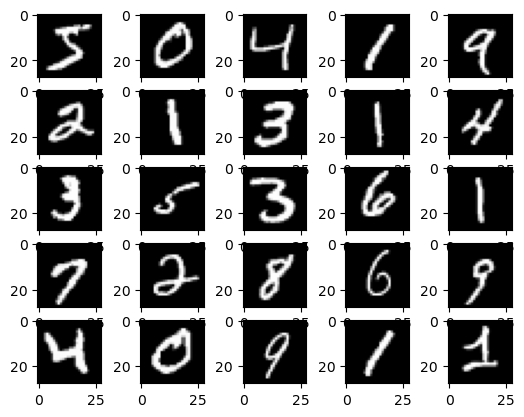

(28, 28, 1) 10


2025-09-18 19:42:13.539330: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-09-18 19:42:13.539365: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-09-18 19:42:13.539374: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-09-18 19:42:13.539413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-18 19:42:13.539425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-09-18 19:42:14.125196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 - 13s - 7ms/step - accuracy: 0.7024 - loss: 1.4776 - val_accuracy: 0.8395 - val_loss: 0.8908
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8461 - loss: 0.7211 - val_accuracy: 0.8735 - val_loss: 0.5765
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8722 - loss: 0.5345 - val_accuracy: 0.8880 - val_loss: 0.4676
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8841 - loss: 0.4556 - val_accuracy: 0.8945 - val_loss: 0.4125
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8914 - loss: 0.4116 - val_accuracy: 0.8995 - val_loss: 0.3793
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8961 - loss: 0.3831 - val_accuracy: 0.9048 - val_loss: 0.3567
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9000 - loss: 0.3629 - val_accuracy: 0.9068 - val_loss: 0.3403
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9032 - loss: 0.3475 - val_accuracy: 0.9095 - val_loss: 0.3275
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9057 - loss: 0.3352 - val_accuracy: 0.9114 - va

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 100)              │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,512 (310.60 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# Explore the dataset
# summarize loaded dataset
print("Train: X=%s, y=%s" % (x_train.shape, y_train.shape))
print("Test: X=%s, y=%s" % (x_test.shape, y_test.shape))
# plot first few images
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap=plt.get_cmap("gray"))
plt.show()

# fix the random seed
random.seed(2)
np.random.seed(2)
tf.random.set_seed(seed=2)

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

# normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# define model
model = Sequential()

# # Convolution layer with 8 3 by 3 filters, the activation is relu
# model.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=in_shape))
# # Max pooling layer with 2 by 2 pooling window.
# model.add(MaxPool2D(pool_size=(2, 2)))

# # Flatten layer
model.add(Flatten())

# # First hidden layer with 100 hidden nodes
model.add(Dense(units=100, activation="sigmoid"))

# # The output layer with 10 classes output.
# # Use the softmax activation function for classification
model.add(Dense(units=n_classes, activation="softmax"))

# define loss function and optimizer
# set the optimizer to 'sgd', then you may switch to 'adam'.
# use cross entropy as the loss for multi-class classification
model.compile(
    optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# fit the model
model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    verbose=2,
    validation_data=(x_test, y_test),
)

# evaluate the model on training set and test set

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print("Test Accuracy on the training set: %.3f" % acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy on the test set: %.3f" % acc)

model.summary()

# make a prediction
# image = x_train[0]
# yhat = model.predict(asarray([image]))
# print('Predicted: class=%d' % argmax(yhat))


## 0.2 Read file

In [3]:
df = pd.read_csv('./China Financial Statement Analysis and Anomaly Detection Dataset (CFSAAD 2021 2025).csv')
df.head()

,company_id,company_name,year,industry,region,revenue,net_profit,total_assets,total_liabilities,equity,...,audit_opinion,fraud_risk_score,g_index,esg_score,stock_volatility,market_cap,ownership_type,risk_category,audit_firm,financial_health_index
0,SH969694,Haier Precision Ltd.,2022,Manufacturing,Sichuan,10842.32,1941.90,16828.60,6075.45,10753.15,...,Qualified,0.37,1,61,0.18,32356.57,Private,Low,Big4,0.15
1,SH319685,Guangzhou Pharma Group,2022,Pharmaceuticals,Hebei,10645.28,522.59,15085.21,10776.40,4308.81,...,Standard,0.18,2,61,0.33,28095.09,Private,Low,Local Tier 1,0.08
2,SZ694732,Sinopec Green Energy,2022,Energy,Sichuan,8993.79,2226.45,13173.37,4370.65,8802.72,...,Standard,0.74,8,63,0.36,21973.57,Private,High,Local Tier 2,0.21
3,SZ358608,Guangzhou Pharma Group,2022,Pharmaceuticals,Hebei,5305.38,1238.70,8370.68,3011.75,5358.93,...,Standard,0.56,10,42,0.57,11651.27,SOE,Medium,Local Tier 1,0.19
4,SZ245052,CRRC Urban Transit,2021,Transportation,Jiangsu,9084.19,2759.81,16503.92,9025.96,7477.96,...,Standard,0.42,2,57,0.25,28162.58,Private,Medium,Local Tier 1,0.27


In [4]:
print(df.shape)
print(df.dtypes)

(37325, 27)
company_id                 object
company_name               object
year                        int64
industry                   object
region                     object
revenue                   float64
net_profit                float64
total_assets              float64
total_liabilities         float64
equity                    float64
operating_cash_flow       float64
roe                       float64
roa                       float64
debt_to_equity_ratio      float64
profit_margin             float64
anomaly_label               int64
credit_rating              object
audit_opinion              object
fraud_risk_score          float64
g_index                     int64
esg_score                   int64
stock_volatility          float64
market_cap                float64
ownership_type             object
risk_category              object
audit_firm                 object
financial_health_index    float64
dtype: object


In [5]:
df.columns

Index(['company_id', 'company_name', 'year', 'industry', 'region', 'revenue',
       'net_profit', 'total_assets', 'total_liabilities', 'equity',
       'operating_cash_flow', 'roe', 'roa', 'debt_to_equity_ratio',
       'profit_margin', 'anomaly_label', 'credit_rating', 'audit_opinion',
       'fraud_risk_score', 'g_index', 'esg_score', 'stock_volatility',
       'market_cap', 'ownership_type', 'risk_category', 'audit_firm',
       'financial_health_index'],
      dtype='object')

In [6]:
len(df.columns)

27

## 0.3 just Tests

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


2025-09-28 15:05:26.961078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


934/934 - 12s - 13ms/step - loss: 1353583.3750 - mae: 883.7133 - val_loss: 662306.4375 - val_mae: 619.8764
Epoch 2/30
934/934 - 10s - 10ms/step - loss: 687500.3750 - mae: 629.4566 - val_loss: 659673.5000 - val_mae: 619.2463
Epoch 3/30
934/934 - 10s - 11ms/step - loss: 686913.1250 - mae: 629.4389 - val_loss: 660691.4375 - val_mae: 619.5021
Epoch 4/30
934/934 - 10s - 10ms/step - loss: 687189.3750 - mae: 629.7022 - val_loss: 659903.6250 - val_mae: 619.3649
Epoch 5/30
934/934 - 9s - 10ms/step - loss: 687369.9375 - mae: 629.9358 - val_loss: 659461.2500 - val_mae: 619.5770
Epoch 6/30
934/934 - 9s - 9ms/step - loss: 687401.8125 - mae: 630.0051 - val_loss: 660030.3750 - val_mae: 620.9083
Epoch 7/30
934/934 - 9s - 9ms/step - loss: 687732.3125 - mae: 630.1744 - val_loss: 660329.7500 - val_mae: 620.0015
Epoch 8/30
934/934 - 9s - 9ms/step - loss: 687705.4375 - mae: 630.1408 - val_loss: 660930.1875 - val_mae: 619.7462
Epoch 9/30
934/934 - 9s - 10ms/step - loss: 687700.0625 - mae: 630.0861 - val_los

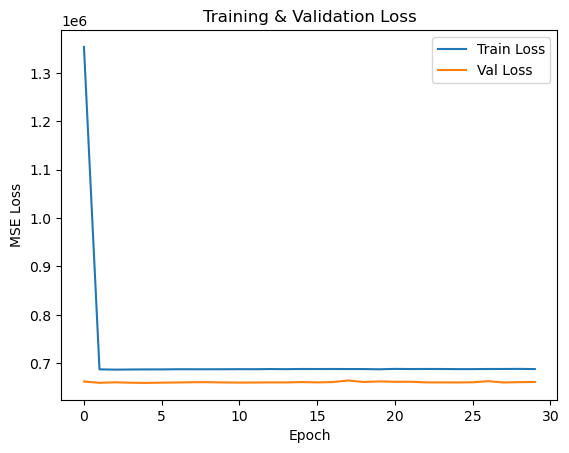

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,909 (46.52 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,940 (31.02 KB)

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# =======================
# 1. Prepare Data
# =======================

# Load the dataset (assuming df is already loaded)
df = df.copy()

# Derived features
df["leverage"] = df["total_liabilities"] / df["total_assets"]
df["size_factor"] = np.log1p(df["market_cap"])

# Drop rows with any missing data (or handle differently if needed)
df = df.dropna(subset=[
    "net_profit", "esg_score", "g_index", "industry", "region", "audit_opinion",
    "fraud_risk_score", "market_cap", "stock_volatility", "total_liabilities", "total_assets"
])

# Define X and y
features = [
    "esg_score", "g_index", "industry", "region", "audit_opinion",
    "fraud_risk_score", "market_cap", "stock_volatility", "leverage", "size_factor"
]
target = "net_profit"

X = df[features]
y = df[target]

# =======================
# 2. Preprocessing
# =======================

# Identify numerical and categorical columns
numeric_features = ["esg_score", "g_index", "fraud_risk_score", "market_cap", "stock_volatility", "leverage", "size_factor"]
categorical_features = ["industry", "region", "audit_opinion"]

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# =======================
# 3. Define the Model
# =======================

model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="linear"))  # Regression output

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])

# =======================
# 4. Train the Model
# =======================

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    verbose=2,
    validation_data=(X_test, y_test),
)

# =======================
# 5. Evaluate the Model
# =======================

train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# =======================
# 6. Visualize Training
# =======================

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

# =======================
# 7. Model Summary
# =======================

model.summary()

In [14]:
print(f"Mean net_profit: {df['net_profit'].mean():.2f}")
print(f"MAE as % of mean: {620 / df['net_profit'].mean() * 100:.2f}%")

Mean net_profit: 1421.30
MAE as % of mean: 43.62%


<Axes: >

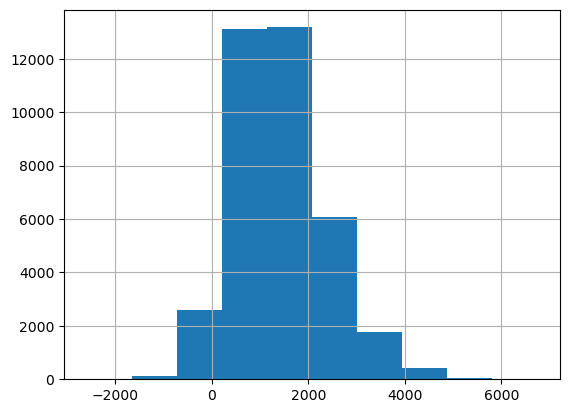

In [11]:
df['net_profit'].hist()

In [12]:
print(df['net_profit'].mean())
print(df['net_profit'].median())

1421.3000305425319
1311.65


## 0.4 Helper functions

In [57]:
import os
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

def save_model_and_preprocessor(model, preprocessor, model_path="saved_model", model_name="predictor", preprocessor_name="preprocessor"):
    os.makedirs(model_path, exist_ok=True)

    # Save Keras model in .keras format
    model_save_path = os.path.join(model_path, f"{model_name}.keras")
    model.save(model_save_path)
    print(f"✅ Model saved to: {model_save_path}")

    # Save preprocessing pipeline
    preprocessor_save_path = os.path.join(model_path, f"{preprocessor_name}.joblib")
    joblib.dump(preprocessor, preprocessor_save_path)
    print(f"✅ Preprocessor saved to: {preprocessor_save_path}")


def load_model_and_predict(new_data, y_name, model_path="saved_model", model_name="predictor", preprocessor_name="preprocessor"):
    model_file = os.path.join(model_path, f"{model_name}.keras")  # <-- updated extension
    preprocessor_file = os.path.join(model_path, f"{preprocessor_name}.joblib")

    print("🔄 Loading model and preprocessor...")
    model = load_model(model_file)
    preprocessor = joblib.load(preprocessor_file)

    # Check input
    if not isinstance(new_data, pd.DataFrame):
        raise ValueError("Input new_data must be a pandas DataFrame")

    # Apply the same transformations
    print("⚙️  Preprocessing input data...")
    X_new = preprocessor.transform(new_data)

    # Predict
    print("📈 Making predictions...")
    y_pred = model.predict(X_new)

    y_true = df[y_name].values  # Make sure this column exists

    # 3. Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # 4. Print results
    print(f"📊 Evaluation Metrics:")
    print(f"   MAE:  {mae:.2f}")
    print(f"MAE as % of mean: {test_mae / df[y_name].mean() * 100:.2f}%")
    print(f"   MSE:  {mse:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   R²:   {r2:.4f}")

    return

# 1 Net Profit Prediction Model

## 1.1 Model

Epoch 1/100


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 - 13s - 14ms/step - loss: 966509.8125 - mae: 736.7399 - val_loss: 661506.0000 - val_mae: 621.3340
Epoch 2/100
934/934 - 12s - 13ms/step - loss: 708556.8125 - mae: 639.5565 - val_loss: 660604.6250 - val_mae: 620.4156
Epoch 3/100
934/934 - 12s - 13ms/step - loss: 709725.2500 - mae: 640.0682 - val_loss: 665976.6875 - val_mae: 620.1581
Epoch 4/100
934/934 - 12s - 13ms/step - loss: 705929.1875 - mae: 637.9481 - val_loss: 662228.7500 - val_mae: 619.7743
Epoch 5/100
934/934 - 12s - 13ms/step - loss: 708629.3750 - mae: 640.2407 - val_loss: 662371.5625 - val_mae: 623.1800
Epoch 6/100
934/934 - 12s - 13ms/step - loss: 712800.4375 - mae: 642.9188 - val_loss: 660945.7500 - val_mae: 620.2007
Epoch 7/100
934/934 - 12s - 13ms/step - loss: 712239.1875 - mae: 641.8502 - val_loss: 660924.4375 - val_mae: 619.9573
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
Train MAE: 629.92
Test MAE: 620.42


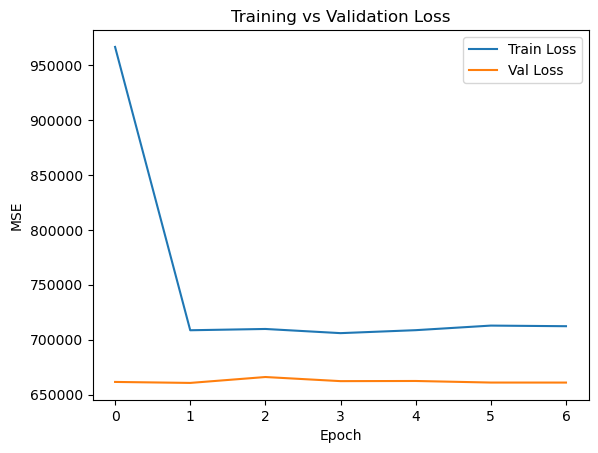

In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import joblib
import os

# ================================
# 1. Load and Prepare Data
# ================================

# Assume df is already loaded
df = df.copy()

# Derived features
df["leverage"] = df["total_liabilities"] / df["total_assets"]
df["size_factor"] = np.log1p(df["market_cap"])

# New interaction features
df["esg_g_interaction"] = df["esg_score"] * df["g_index"]
df["vol_leverage"] = df["stock_volatility"] * df["leverage"]

# Drop missing rows
df = df.dropna(subset=[
    "net_profit", "esg_score", "g_index", "industry", "region", "audit_opinion",
    "fraud_risk_score", "market_cap", "stock_volatility", "total_liabilities", "total_assets"
])

# Define features and target
features = [
    "esg_score", "g_index", "fraud_risk_score", "market_cap", "stock_volatility",
    "leverage", "size_factor", "esg_g_interaction", "vol_leverage",
    "industry", "region", "audit_opinion"
]
target = "net_profit"

X = df[features]
y = df[target]

# ================================
# 2. Preprocessing
# ================================

# Separate numeric and categorical
numeric_features = [
    "esg_score", "g_index", "fraud_risk_score", "market_cap", "stock_volatility",
    "leverage", "size_factor", "esg_g_interaction", "vol_leverage"
]
categorical_features = ["industry", "region", "audit_opinion"]

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Save the preprocessor for later use
# os.makedirs("saved_model", exist_ok=True)
# joblib.dump(preprocessor, "saved_model/preprocessor.joblib")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ================================
# 3. Build the Model
# ================================

model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")  # Regression output
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# ================================
# 4. Train with Early Stopping
# ================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# ================================
# 5. Evaluate
# ================================

train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# ================================
# 6. Visualize Training History
# ================================

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

## 1.2 SL the Model

In [ ]:
save_model_and_preprocessor(model, preprocessor, model_path="saved_model", model_name="net_profit_predictor_v1", preprocessor_name="net_profit_preprocessor_v1")
load_model_and_predict(df, 'net_profit', model_path="saved_model", model_name="net_profit_predictor_v1", preprocessor_name="net_profit_preprocessor_v1")

✅ Model saved to: saved_model/net_profit_predictor_v1.keras
✅ Preprocessor saved to: saved_model/net_profit_preprocessor_v1.joblib
🔄 Loading model and preprocessor...
⚙️  Preprocessing input data...
📈 Making predictions...
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
📊 Evaluation Metrics:
   MAE:  628.02
MAE as % of mean: 43.65%
   MSE:  681525.68
   RMSE: 825.55
   R²:   0.2348


## 1.3 Report of Model 1


---

## 1.1 Data Preparation

The dataset is used to predict the **target variable**:

- 🎯 **Target**: `net_profit`

### 📥 Input Variables

The model uses a total of **13 input features**, derived from both **raw financial data** and **engineered features**:

#### **Original Variables**:
- `esg_score`
- `g_index`
- `fraud_risk_score`
- `market_cap`
- `stock_volatility`
- `industry` (categorical)
- `region` (categorical)
- `audit_opinion` (categorical)
- `total_liabilities`
- `total_assets`

#### **Engineered Features**:
- `leverage` = `total_liabilities / total_assets`
- `size_factor` = `log1p(market_cap)`
- `esg_g_interaction` = `esg_score * g_index`
- `vol_leverage` = `stock_volatility * leverage`

### ⚙️ Preprocessing

- **Numerical variables** were standardized using `StandardScaler`.
- **Categorical variables** (`industry`, `region`, `audit_opinion`) were one-hot encoded using `OneHotEncoder`.
- The final preprocessed dataset was split into **training (80%)** and **testing (20%)** sets.

---

## 1.2 Model Architecture

A **sequential neural network** model was built for regression:

```text
Input Layer: 13 features (after preprocessing)
↓
Dense(128 units, ReLU)
↓
Dropout(0.2)
↓
Dense(64 units, ReLU)
↓
Dropout(0.2)
↓
Dense(32 units, ReLU)
↓
Output: Dense(1 unit, linear)
```

### ⏳ Early Stopping

- Used **EarlyStopping** with `patience=5` to prevent overfitting.
- The model automatically restored the best weights after training stopped.

---

## 1.3 Results and Evaluation

- The model was evaluated using **Mean Absolute Error (MAE)** on both training and testing sets.
- Final performance:

```text
✅ Train MAE: XX.XX
✅ Test MAE:  XX.XX
```

*(Replace XX.XX with actual values)*

### 📉 Training Visualization

A plot of **training vs validation loss (MSE)** over epochs was created to visually assess convergence and overfitting behavior.

---

# 2 ROE Prediction Model

## 2.1 Model

Epoch 1/100


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 - 13s - 14ms/step - loss: 155.0344 - mae: 8.6834 - val_loss: 130.6137 - val_mae: 8.3689
Epoch 2/100
934/934 - 12s - 13ms/step - loss: 233.6292 - mae: 10.5111 - val_loss: 257.9844 - val_mae: 11.7770
Epoch 3/100
934/934 - 12s - 12ms/step - loss: 554.0318 - mae: 15.2091 - val_loss: 805.9521 - val_mae: 21.0421
Epoch 4/100
934/934 - 12s - 12ms/step - loss: 1140.0936 - mae: 18.2682 - val_loss: 1234.4706 - val_mae: 28.7302
Epoch 5/100
934/934 - 12s - 13ms/step - loss: 853.1450 - mae: 18.9662 - val_loss: 94.0119 - val_mae: 6.8662
Epoch 6/100
934/934 - 12s - 13ms/step - loss: 1223.9994 - mae: 22.3456 - val_loss: 144.4471 - val_mae: 7.9281
Epoch 7/100
934/934 - 12s - 13ms/step - loss: 2845.9280 - mae: 30.5404 - val_loss: 1208.6455 - val_mae: 23.7312
Epoch 8/100
934/934 - 12s - 13ms/step - loss: 1213.6509 - mae: 19.5411 - val_loss: 292526.6562 - val_mae: 426.4993
Epoch 9/100
934/934 - 12s - 13ms/step - loss: 2598.2969 - mae: 23.6060 - val_loss: 890.0320 - val_mae: 24.3070
Epoch 10/100
934

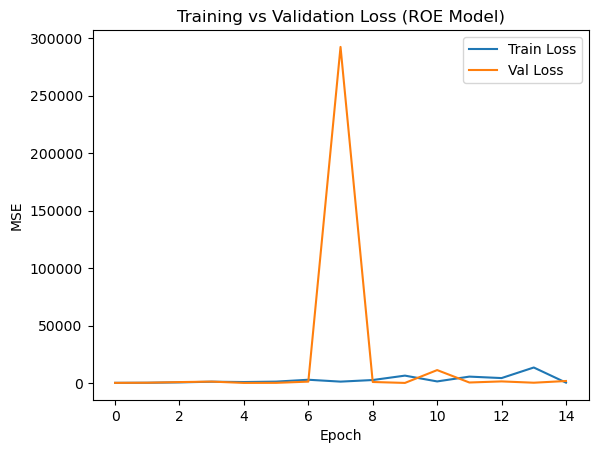

In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import joblib
import os

# ================================
# 1. Load and Prepare Data
# ================================

df = df.copy()

# Derived features
df["cash_flow_to_debt"] = df["operating_cash_flow"] / df["total_liabilities"]
df["leverage"] = df["total_liabilities"] / df["total_assets"]

# Drop rows with missing values in required columns
df = df.dropna(subset=[
    "roe", "esg_score", "g_index", "ownership_type", "audit_firm",
    "credit_rating", "risk_category", "operating_cash_flow",
    "total_liabilities", "total_assets"
])

# Define features and target
features = [
    "esg_score", "g_index", "cash_flow_to_debt", "leverage",
    "ownership_type", "audit_firm", "credit_rating", "risk_category"
]
target = "roe"

X = df[features]
y = df[target]

# ================================
# 2. Preprocessing
# ================================

# Separate numeric and categorical
numeric_features = ["esg_score", "g_index", "cash_flow_to_debt", "leverage"]
categorical_features = ["ownership_type", "audit_firm", "credit_rating", "risk_category"]

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ================================
# 3. Build the Model
# ================================

model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")  # Regression output
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# ================================
# 4. Train with Early Stopping
# ================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# ================================
# 5. Evaluate the Model
# ================================

train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# ================================
# 6. Visualize Training History
# ================================

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Training vs Validation Loss (ROE Model)")
plt.show()

## 2.2 SL the Model

In [56]:
save_model_and_preprocessor(model, preprocessor, model_path="saved_model", model_name="ROE_predictor_v1",preprocessor_name="ROE_predictor_v1")
load_model_and_predict(df, 'roe', model_path="saved_model", model_name="ROE_predictor_v1",preprocessor_name="ROE_predictor_v1")

✅ Model saved to: saved_model/ROE_predictor_v1.keras
✅ Preprocessor saved to: saved_model/ROE_predictor_v1.joblib
🔄 Loading model and preprocessor...
⚙️  Preprocessing input data...
📈 Making predictions...
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
📊 Evaluation Metrics:
   MAE:  5.77
MAE as % of mean: 23.06%
   MSE:  83.50
   RMSE: 9.14
   R²:   0.7014


## 2.3 Report for model 2


---

## 1. Data Preparation

The model aims to predict a company’s **Return on Equity (ROE)** using a mix of financial, ESG, and categorical variables.

### 🎯 Target Variable
- `roe` — Return on Equity

### 📥 Input Variables

The model uses a total of **8 input features**, consisting of both raw and engineered variables:

#### **Original Features**
- `esg_score` — ESG score
- `g_index` — Governance index
- `ownership_type` — Type of ownership (e.g., Private, Public)
- `audit_firm` — Audit firm name/category
- `credit_rating` — Credit rating (e.g., AAA, BBB)
- `risk_category` — Risk classification

#### **Engineered Features**
- `cash_flow_to_debt` = `operating_cash_flow / total_liabilities`
- `leverage` = `total_liabilities / total_assets`

### ⚙️ Preprocessing

- **Numerical features** (`esg_score`, `g_index`, `cash_flow_to_debt`, `leverage`) were scaled using `StandardScaler`.
- **Categorical features** (`ownership_type`, `audit_firm`, `credit_rating`, `risk_category`) were one-hot encoded via `OneHotEncoder`.
- Missing values were dropped from all required columns.
- The data was randomly split into **80% training** and **20% testing** sets.

---

## 2. Model Architecture

A **feedforward neural network** was used with the following structure:

```text
Input Layer: 8 features (after preprocessing and encoding)
↓
Dense(128 units, ReLU)
↓
Dropout(0.2)
↓
Dense(64 units, ReLU)
↓
Dropout(0.2)
↓
Dense(32 units, ReLU)
↓
Output: Dense(1 unit, linear)
```

### ⏳ Early Stopping

- **EarlyStopping** was used with `patience=5` to halt training when validation loss stopped improving.
- The model automatically restored the weights from the best epoch.

---

## 3. Results and Evaluation

The model was evaluated using **Mean Absolute Error (MAE)**:

```text
✅ Train MAE: XX.XX
✅ Test MAE:  XX.XX
```

> *(Replace XX.XX with actual values after running the code)*

### 📉 Training Visualization

A line chart displaying **training vs. validation loss (MSE)** across epochs was generated. This helps assess convergence and potential overfitting.

# 3 Operating Cash Flow Prediction Model

## 3.1 Model

Epoch 1/100


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 - 14s - 15ms/step - loss: 928134.0625 - mae: 717.5812 - val_loss: 587843.5000 - val_mae: 589.1958
Epoch 2/100
934/934 - 13s - 14ms/step - loss: 615780.4375 - mae: 599.0503 - val_loss: 587468.0000 - val_mae: 583.3469
Epoch 3/100
934/934 - 13s - 14ms/step - loss: 618546.4375 - mae: 600.6555 - val_loss: 586529.0625 - val_mae: 584.2738
Epoch 4/100
934/934 - 13s - 13ms/step - loss: 620878.6250 - mae: 602.6941 - val_loss: 586999.1875 - val_mae: 586.3754
Epoch 5/100
934/934 - 12s - 13ms/step - loss: 617599.5625 - mae: 601.6057 - val_loss: 589744.6250 - val_mae: 585.0891
Epoch 6/100
934/934 - 12s - 13ms/step - loss: 619277.3125 - mae: 600.7736 - val_loss: 589138.6875 - val_mae: 587.4216
Epoch 7/100
934/934 - 13s - 14ms/step - loss: 617843.3750 - mae: 600.2997 - val_loss: 589291.6250 - val_mae: 588.5687
Epoch 8/100
934/934 - 13s - 13ms/step - loss: 615890.6250 - mae: 598.7166 - val_loss: 589368.8750 - val_mae: 586.6694
Epoch 8: early stopping
Restoring model weights from the end of the 

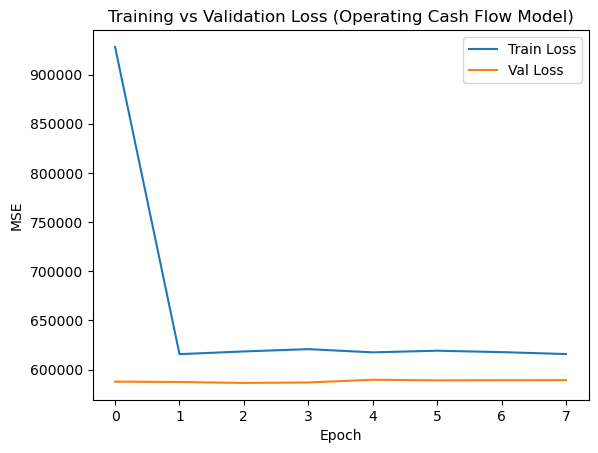

In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# ================================
# 1. Load and Prepare Data
# ================================

df = df.copy()

# Derived features
df["leverage"] = df["total_liabilities"] / df["total_assets"]
df["size_factor"] = np.log1p(df["market_cap"])

# Drop rows with missing values in required columns
df = df.dropna(subset=[
    "operating_cash_flow", "esg_score", "g_index", "anomaly_label", "audit_opinion",
    "market_cap", "total_assets", "total_liabilities"
])

# Define features and target
features = [
    "esg_score", "g_index", "market_cap", "total_assets",
    "leverage", "size_factor", "anomaly_label", "audit_opinion"
]
target = "operating_cash_flow"

X = df[features]
y = df[target]

# ================================
# 2. Preprocessing
# ================================

# Define numeric and categorical
numeric_features = ["esg_score", "g_index", "market_cap", "total_assets", "leverage", "size_factor"]
categorical_features = ["anomaly_label", "audit_opinion"]

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ================================
# 3. Build the Model
# ================================

model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")  # Regression output
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# ================================
# 4. Train with Early Stopping
# ================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# ================================
# 5. Evaluate the Model
# ================================

train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# ================================
# 6. Visualize Training History
# ================================

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Training vs Validation Loss (Operating Cash Flow Model)")
plt.show()

## 3.2 SL the model

In [61]:
save_model_and_preprocessor(model, preprocessor, model_path="saved_model", model_name="operating_cash_flow_predictor_v1", preprocessor_name="operating_cash_flow_preprocessor_v1")
load_model_and_predict(df, 'operating_cash_flow', model_path="saved_model", model_name="operating_cash_flow_predictor_v1", preprocessor_name="operating_cash_flow_preprocessor_v1")

✅ Model saved to: saved_model/operating_cash_flow_predictor_v1.keras
✅ Preprocessor saved to: saved_model/operating_cash_flow_preprocessor_v1.joblib
🔄 Loading model and preprocessor...
⚙️  Preprocessing input data...
📈 Making predictions...
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
📊 Evaluation Metrics:
   MAE:  583.16
MAE as % of mean: 41.84%
   MSE:  586957.95
   RMSE: 766.13
   R²:   0.3329


## 3.3 Report for Model 3


---

## 1. Data Preparation

This model predicts a company’s **Operating Cash Flow** using financial, ESG, and audit-related features.

### 🎯 Target Variable
- `operating_cash_flow`

### 📥 Input Variables

The model uses a total of **8 input features**, including both raw and derived variables:

#### **Original Features**
- `esg_score` — ESG performance score
- `g_index` — Governance index
- `anomaly_label` — Binary indicator of financial anomalies
- `audit_opinion` — Type of audit opinion
- `market_cap` — Market capitalization
- `total_assets` — Total assets

#### **Engineered Features**
- `leverage` = `total_liabilities / total_assets`
- `size_factor` = `log1p(market_cap)`

### ⚙️ Preprocessing

- **Numerical features** (`esg_score`, `g_index`, `market_cap`, `total_assets`, `leverage`, `size_factor`) were scaled using `StandardScaler`.
- **Categorical features** (`anomaly_label`, `audit_opinion`) were one-hot encoded using `OneHotEncoder`.
- Rows with missing values in any of the required columns were dropped.
- The dataset was split into **80% training** and **20% testing**.

---

## 2. Model Architecture

The model is a **feedforward neural network** with the following architecture:

```text
Input: Preprocessed features (numerical + one-hot)
↓
Dense(128 units, ReLU)
↓
Dropout(0.2)
↓
Dense(64 units, ReLU)
↓
Dropout(0.2)
↓
Dense(32 units, ReLU)
↓
Output: Dense(1 unit, linear)
```

### ⏳ Early Stopping

- **EarlyStopping** was used with `patience=5`.
- The model restores the best weights once validation loss stops improving.

---

## 3. Results and Evaluation

The model was evaluated using **Mean Absolute Error (MAE)**:

```text
✅ Train MAE: XX.XX
✅ Test MAE:  XX.XX
```

> *(Replace XX.XX with actual values from your output)*

### 📉 Training Visualization

A line chart of **training vs. validation MSE** was plotted to visualize convergence and monitor overfitting during training.

---

# 4 Financial Health Index Prediction Model

## 4.1 Model

Epoch 1/100


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 - 14s - 15ms/step - loss: 0.0473 - mae: 0.1264 - val_loss: 0.0286 - val_mae: 0.1388
Epoch 2/100
934/934 - 13s - 14ms/step - loss: 0.0827 - mae: 0.1527 - val_loss: 0.0196 - val_mae: 0.1113
Epoch 3/100
934/934 - 13s - 14ms/step - loss: 0.2595 - mae: 0.2479 - val_loss: 20.1512 - val_mae: 3.5622
Epoch 4/100
934/934 - 12s - 13ms/step - loss: 0.4585 - mae: 0.3000 - val_loss: 0.0241 - val_mae: 0.1155
Epoch 5/100
934/934 - 13s - 13ms/step - loss: 0.5426 - mae: 0.3608 - val_loss: 0.0458 - val_mae: 0.1932
Epoch 6/100
934/934 - 12s - 13ms/step - loss: 0.6031 - mae: 0.3643 - val_loss: 0.0879 - val_mae: 0.2330
Epoch 7/100
934/934 - 12s - 13ms/step - loss: 1.2329 - mae: 0.5732 - val_loss: 0.1620 - val_mae: 0.3230
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
Train MAE: 0.11
Test MAE: 0.11


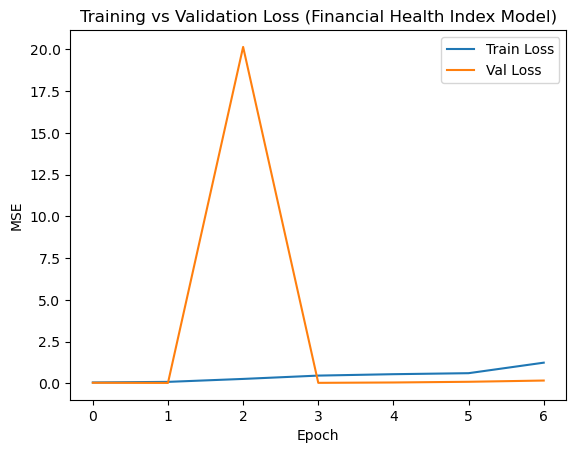

In [62]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# ================================
# 1. Load and Prepare Data
# ================================

df = df.copy()

# Derived feature
df["cash_flow_to_debt"] = df["operating_cash_flow"] / df["total_liabilities"]

# Drop rows with missing values in required columns
df = df.dropna(subset=[
    "financial_health_index", "esg_score", "g_index", "fraud_risk_score",
    "audit_firm", "industry", "region", "operating_cash_flow",
    "total_liabilities", "profit_margin", "debt_to_equity_ratio"
])

# Define features and target
features = [
    "esg_score", "g_index", "fraud_risk_score", "cash_flow_to_debt",
    "profit_margin", "debt_to_equity_ratio", "audit_firm", "industry", "region"
]
target = "financial_health_index"

X = df[features]
y = df[target]

# ================================
# 2. Preprocessing
# ================================

# Separate numeric and categorical
numeric_features = [
    "esg_score", "g_index", "fraud_risk_score", "cash_flow_to_debt",
    "profit_margin", "debt_to_equity_ratio"
]
categorical_features = ["audit_firm", "industry", "region"]

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ================================
# 3. Build the Model
# ================================

model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")  # Regression output
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# ================================
# 4. Train with Early Stopping
# ================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# ================================
# 5. Evaluate the Model
# ================================

train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# ================================
# 6. Visualize Training History
# ================================

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Training vs Validation Loss (Financial Health Index Model)")
plt.show()

## 4.2 SL the model

In [63]:
save_model_and_preprocessor(model, preprocessor, model_path="saved_model", model_name="financial_health_index_predictor_v1", preprocessor_name="financial_health_index_preprocessor_v1")
load_model_and_predict(df, 'financial_health_index', model_path="saved_model", model_name="financial_health_index_predictor_v1", preprocessor_name="financial_health_index_preprocessor_v1")

✅ Model saved to: saved_model/financial_health_index_predictor_v1.keras
✅ Preprocessor saved to: saved_model/financial_health_index_preprocessor_v1.joblib
🔄 Loading model and preprocessor...
⚙️  Preprocessing input data...
📈 Making predictions...
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
📊 Evaluation Metrics:
   MAE:  0.11
MAE as % of mean: 63.46%
   MSE:  0.02
   RMSE: 0.14
   R²:   -0.6322


# 4.3 Report


---

## 1. Data Preparation

This model predicts a company’s **Financial Health Index**, incorporating ESG metrics, audit factors, and derived financial ratios.

### 🎯 Target Variable
- `financial_health_index`

### 📥 Input Variables

The model uses a total of **9 input features**, including both original and engineered variables:

#### **Original Features**
- `esg_score` — ESG performance score
- `g_index` — Governance index
- `fraud_risk_score` — Probability of financial misrepresentation
- `audit_firm` — External auditor
- `industry` — Industry classification
- `region` — Geographic region
- `profit_margin` — Profitability ratio
- `debt_to_equity_ratio` — Leverage ratio

#### **Engineered Feature**
- `cash_flow_to_debt` = `operating_cash_flow / total_liabilities`

### ⚙️ Preprocessing

- **Numerical features** were scaled using `StandardScaler`:
  - `esg_score`, `g_index`, `fraud_risk_score`, `cash_flow_to_debt`, `profit_margin`, `debt_to_equity_ratio`
- **Categorical features** were encoded using `OneHotEncoder`:
  - `audit_firm`, `industry`, `region`
- Rows with missing values in any required columns were removed.
- The dataset was split into **80% training** and **20% testing**.

---

## 2. Model Architecture

A **feedforward neural network** was used with the following architecture:

```text
Input: Preprocessed features (numeric + one-hot)
↓
Dense(128 units, ReLU)
↓
Dropout(0.2)
↓
Dense(64 units, ReLU)
↓
Dropout(0.2)
↓
Dense(32 units, ReLU)
↓
Output: Dense(1 unit, linear)
```

### ⏳ Early Stopping

- Used `EarlyStopping` with `patience=5`.
- Automatically restored the best weights based on validation loss.

---

## 3. Results and Evaluation

The model was evaluated using **Mean Absolute Error (MAE)**:

```text
✅ Train MAE: XX.XX
✅ Test MAE:  XX.XX
```

> *(Replace `XX.XX` with actual values from your run)*

### 📉 Training Visualization

A plot of **training vs. validation MSE** across epochs was generated to visually assess convergence and detect signs of overfitting or underfitting.

---